<h1 align="center">Lecture</h1>

## Активации из сетей для классификации, это хорошие признаки для изображений

<img src="img/act.png" width="800">


## Современные архитектуры очень глубокие , самые модные 

### VGG (стандартная архитектура, без наворотов)

<img src="img/vgg.png" width="600">

### ResNet (Shortcut + Batch Normalization)
 
<img src="img/resnet.png" width="800">
 
### GoogleNet (Много раз предсказываем классы на разных уровнях сети)

 
<img src="img/gln.png" width="800">


## Чем глубже слой тем более высокоуровневые признаки он детектирует

<img src="img/feat.png" width="800">

## На практике гораздо проще дообучать уже обученные сети (Fine-Tuning)

<img src="img/ft.jpg" width="600">

## Dark Magic 

<img src="img/dm.png" width="600">

# Сегодня Theano and Lasagne :)

<h1 align="center">Theano</h1>

```bash
pip install -U https://github.com/Theano/Theano/archive/master.zip
pip install -U https://github.com/Lasagne/Lasagne/archive/master.zip
```

### Разминка

In [1]:
import theano
import theano.tensor as T

%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### будущий параметр функции -- символьная переменная

In [2]:
N = T.scalar('a dimension', dtype='float32')

#### рецепт получения квадрата -- орперации над символьными переменным

In [3]:
result = T.power(N, 2)

#### theano.grad(cost, wrt)

In [4]:
grad_result = theano.grad(result, N) 

#### компиляция функции "получения квадрата"

In [5]:
sq_function = theano.function(inputs=[N], outputs=result)
gr_function = theano.function(inputs=[N], outputs=grad_result)

#### применение функции

In [6]:
# Заводим np.array x
xv = np.arange(-10, 10)

# Применяем функцию к каждому x
val = map(float, [sq_function(x) for x in xv])

# Посичтаем градиент в кажой точке
grad = map(float, [gr_function(x) for x in xv])

### Что мы увидим если нарисуем функцию и градиент?

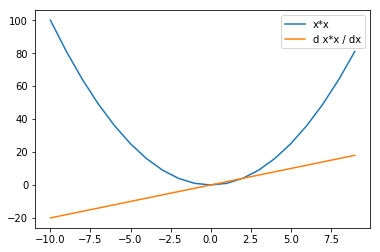

In [7]:
pylab.plot(xv, val, label='x*x')
pylab.plot(xv, grad, label='d x*x / dx')
pylab.legend()

### Как оно работает?
* почти всё, что есть в numpy есть в theano tensor и называется так же: `np.mean -> T.mean` и так далее...
* `theano.function` умеет за одно обновлять `shared` переменные по рецепту в `updates`
* Переменные нужно хранить в `shared` переменных, их можно менять после компиляции `theano.shared(np.ones(10))`

 
Ничего не понятно? Сейчас исправим.

### Теперь сам, LogReg

In [8]:
from sklearn import datasets
X_data, y_data = datasets.load_digits(2, return_X_y=True)

In [9]:
print 'y метки классов 0 или 1 [форма - %s]:' % (str(y_data.shape)),y_data[:10]
print 'X цифорки вытянутые в вектор [форма - %s]:' % (str(X_data.shape))
print X_data[0].reshape((8, 8))

y метки классов 0 или 1 [форма - (360,)]: [0 1 0 1 0 1 0 0 1 1]
X цифорки вытянутые в вектор [форма - (360, 64)]:
[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


In [10]:
# переменные и входы
W = theano.shared(np.random.normal(0, 1, 64))
X = T.fmatrix()
y = T.fvector()

In [11]:
predicted_y = 1 / (1 + T.exp(-T.dot(X, W)))
loss = ((y - predicted_y) ** 2).mean()
grad = T.grad(loss, W)
# {W: <новое значение весов после шага градиентного спуска>}
learning_rate = 0.05
updates = {W: W - learning_rate * grad}

In [12]:
train_function = theano.function([X, y], loss, updates=updates, allow_input_downcast=True)
predict_function = theano.function([X], predicted_y, allow_input_downcast=True)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_data,y_data)

 loss at iter 0:0.2690  train auc: 0.884917582418  test auc: 0.849702380952
 loss at iter 1:0.2645  train auc: 0.89282967033  test auc: 0.850198412698
 loss at iter 2:0.2604  train auc: 0.900961538462  test auc: 0.848214285714
 loss at iter 3:0.2547  train auc: 0.908434065934  test auc: 0.855902777778
 loss at iter 4:0.2448  train auc: 0.91989010989  test auc: 0.876736111111
 loss at iter 5:0.2304  train auc: 0.920879120879  test auc: 0.902281746032
 loss at iter 6:0.2213  train auc: 0.921428571429  test auc: 0.921626984127
 loss at iter 7:0.2152  train auc: 0.925054945055  test auc: 0.933531746032
 loss at iter 8:0.2075  train auc: 0.932005494505  test auc: 0.934027777778
 loss at iter 9:0.1947  train auc: 0.942527472527  test auc: 0.946428571429
 loss at iter 10:0.1810  train auc: 0.944230769231  test auc: 0.948908730159
 loss at iter 11:0.1659  train auc: 0.945989010989  test auc: 0.951884920635
 loss at iter 12:0.1499  train auc: 0.947582417582  test auc: 0.960069444444
 loss at it

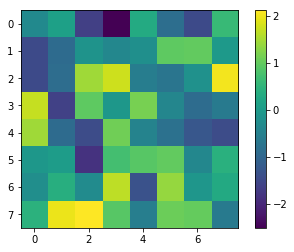

In [14]:
from sklearn.metrics import roc_auc_score

for i in range(1000):
    loss_i = train_function(X_train,y_train)
    print ' loss at iter %i:%.4f' % (i, loss_i),
    print ' train auc:', roc_auc_score(y_train, predict_function(X_train)),
    print ' test auc:', roc_auc_score(y_test, predict_function(X_test))
    
print ("resulting weights:")
plt.imshow(W.get_value().reshape(8,-1))
plt.colorbar()

<h1 align="center">Lasagne</h1>

* lasagne - это библиотека для написания нейронок произвольной формы на theano
* В качестве демо-задачи выберем то же распознавание чисел, но на большем масштабе задачи, картинки 28x28, 10 цифр

In [15]:
from mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()

# print 'X размера', X_train.shape, 'y размера', y_train.shape

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

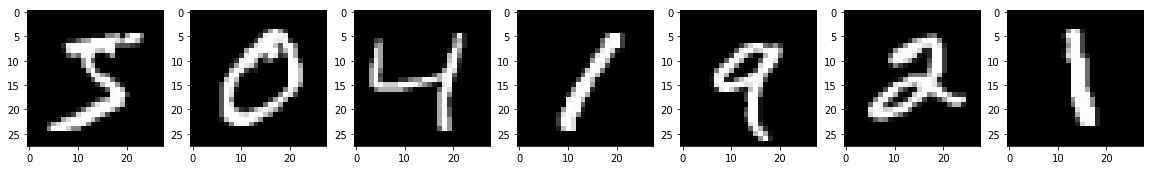

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(20, 20))

for i, ax in enumerate(axes):
    ax.imshow(X_train[i, 0], cmap='gray')

Давайте посмотрим на DenseLayer в lasagne
- http://lasagne.readthedocs.io/en/latest/modules/layers/dense.html
- https://github.com/Lasagne/Lasagne/blob/master/lasagne/layers/dense.py#L16-L124 
- Весь содаржательный код тут https://github.com/Lasagne/Lasagne/blob/master/lasagne/layers/dense.py#L121 

In [18]:
import lasagne
from theano import tensor as T
from lasagne.nonlinearities import softmax
from sklearn.preprocessing import OneHotEncoder
from lasagne import init
from lasagne.objectives import cross

X, y = T.tensor4('X'), T.vector('y', 'int32')

Так задаётся архитектура нейронки

In [19]:
#входной слой (вспомогательный)
net = lasagne.layers.InputLayer(shape=(None, 1, 28, 28), input_var=X)

# init.Constant() -- плохо
net = lasagne.layers.Conv2DLayer(net, 15, 3, pad='valid') # сверточный слой
net = lasagne.layers.Conv2DLayer(net, 10,  2, pad='full')  # сверточный слой

net = lasagne.layers.DenseLayer(net, num_units=500) # полносвязный слой
net = lasagne.layers.DropoutLayer(net, 0.5)         # регуляризатор
net = lasagne.layers.DenseLayer(net, num_units=200) # полносвязный слой

# плохо
# net = lasagne.layers.DenseLayer(net, num_units=10)  # полносвязный слой
net = lasagne.layers.DenseLayer(net, num_units=10, nonlinearity=lasagne.nonlinearities.softmax)  # полносвязный слой

In [20]:
#предсказание нейронки (theano-преобразование)
y_predicted = lasagne.layers.get_output(net)

In [21]:
#все веса нейронки (shared-переменные)
# all_weights = lasagne.layers.get_all_params(net)
all_weights = lasagne.layers.get_all_params(net, trainable=True)
print all_weights

[W, b, W, b, W, b, W, b, W, b]


In [23]:
#функция ошибки и точности будет прямо внутри
loss = lasagne.objectives.categorical_crossentropy(y_predicted, y).mean()
accuracy = lasagne.objectives.categorical_accuracy(y_predicted, y).mean()

In [24]:
#сразу посчитать словарь обновлённых значений с шагом по градиенту, как раньше
updates = lasagne.updates.momentum(loss, all_weights, learning_rate=0.01, momentum=0.9);

In [25]:
#функция, делает updates и возвращащет значение функции потерь и точности
train_fun = theano.function([X, y], [loss, accuracy], updates=updates)
accuracy_fun = theano.function([X, y], accuracy) # точность без обновления весов, для теста

# Процесс обучения

In [26]:
import time
from mnist import iterate_minibatches

num_epochs = 10 #количество проходов по данным
batch_size = 100 #размер мини-батча

for epoch in range(num_epochs):
    # In each epoch, we do a full pass over the training data:
    train_err, train_acc, train_batches = 0, 0, 0
    for batch in iterate_minibatches(X_train, y_train,batch_size):
        inputs, targets = batch
        train_err_batch, train_acc_batch= train_fun(inputs, targets)
        train_err += train_err_batch
        train_acc += train_acc_batch
        train_batches += 1

    # And a full pass over the validation data:
    val_acc, val_batches = 0, 0
    for batch in iterate_minibatches(X_val, y_val, batch_size):
        inputs, targets = batch
        val_acc += accuracy_fun(inputs, targets)
        val_batches += 1
    
    # Then we print the results for this epoch:
    print('Epoch %s of %s took' % (epoch + 1, num_epochs))
    print('\t training loss:\t\t %.5f' % (train_err / train_batches))
    print('\t train accuracy:\t %s' % (train_acc / train_batches * 100))
    print('\t validation accuracy:\t %s' % (val_acc / val_batches * 100))

Epoch 1 of 10 took
	 training loss:		 0.41485
	 train accuracy:	 87.064
	 validation accuracy:	 93.52


KeyboardInterrupt: 

In [ ]:
test_acc = 0
test_batches = 0
for batch in iterate_minibatches(X_test, y_test, 500):
    inputs, targets = batch
    acc = accuracy_fun(inputs, targets)
    test_acc += acc
    test_batches += 1
print("Final results: \n test accuracy:\t\t{:.2f} %".format(test_acc / test_batches * 100))чы

# не забывайте оставлять отзывы 
# о лекции https://goo.gl/gMeYNL о семинаре https://goo.gl/5hlPD0 :)